 # Occammodellen deployad med videocapture och de 3 frågeställningarna om kursen

In [12]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.pyplot as plt

# Förenklad modell endast två layers (convolution+pooling)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
])

# Callbacks
checkpoint = ModelCheckpoint("./modelskarp3occam.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=5,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Kompilering mindre learning rate testades men gav ingen förbättring 
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Data prep
picture_size = 48
folder_path = r'C:\Users\Daniel\Documents\ec_utbildning\DL\Kunskapskontroll\images\images'
batch_size = 128
epochs = 25  # Set the number of epochs

# Skalning
datagen_train = ImageDataGenerator(rescale=1./255)
datagen_val = ImageDataGenerator(rescale=1./255)

# Flow generatorer 
train_generator = datagen_train.flow_from_directory(os.path.join(folder_path, "train_mini"),
                                                    target_size=(picture_size, picture_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_val.flow_from_directory(os.path.join(folder_path, "validation_mini"),
                                                       target_size=(picture_size, picture_size),
                                                       color_mode="grayscale",
                                                       batch_size=batch_size,
                                                       class_mode='categorical',
                                                       shuffle=False)

# Skapa TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, picture_size, picture_size, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32))
)

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, picture_size, picture_size, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, validation_generator.num_classes), dtype=tf.float32))
)

# repeat metoden
train_dataset = train_dataset.repeat()
validation_dataset = validation_dataset.repeat()

# optimering genom att förhämta data
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# beräknar epoksteg och valideringssteg
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

# Träning
historyskarp3occam = model.fit(x=train_dataset,
                         steps_per_epoch=steps_per_epoch,
                         epochs=epochs,
                         validation_data=validation_dataset,
                         validation_steps=validation_steps,
                         callbacks=callbacks_list)

# För att spara tränings historik
with open('historyskarp3occam.pkl', 'wb') as file:
    pickle.dump(historyskarp3occam.history, file)

Found 6750 images belonging to 7 classes.
Found 3582 images belonging to 7 classes.
Epoch 1/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.2194 - loss: 1.8807
Epoch 1: val_accuracy improved from -inf to 0.31076, saving model to ./modelskarp3occam.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.2202 - loss: 1.8795 - val_accuracy: 0.3108 - val_loss: 1.7118 - learning_rate: 0.0010
Epoch 2/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3629 - loss: 1.6583
Epoch 2: val_accuracy improved from 0.31076 to 0.36769, saving model to ./modelskarp3occam.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.3631 - loss: 1.6578 - val_accuracy: 0.3677 - val_loss: 1.6299 - learning_rate: 0.0010
Epoch 3/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4217 - loss: 1.5477
Epoch 3: val_accuracy improved from 0.36769 to 0.41459, saving model to ./modelskarp3occam.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.4217 - loss: 1.5475 - val_accura

52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9932 - loss: 0.0531 - val_accuracy: 0.8851 - val_loss: 0.7278 - learning_rate: 0.0010
Epoch 22/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9936 - loss: 0.0358
Epoch 22: val_accuracy improved from 0.88506 to 0.89201, saving model to ./modelskarp3occam.keras
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - accuracy: 0.9937 - loss: 0.0357 - val_accuracy: 0.8920 - val_loss: 0.6954 - learning_rate: 2.0000e-04
Epoch 23/25
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.9981 - loss: 0.0226
Epoch 23: val_accuracy did not improve from 0.89201
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.9981 - loss: 0.0226 - val_accuracy: 0.8900 - val_loss: 0.7115 - learning_rate: 2.0000e-04
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 18.


# trainingplots för Occammodellen 

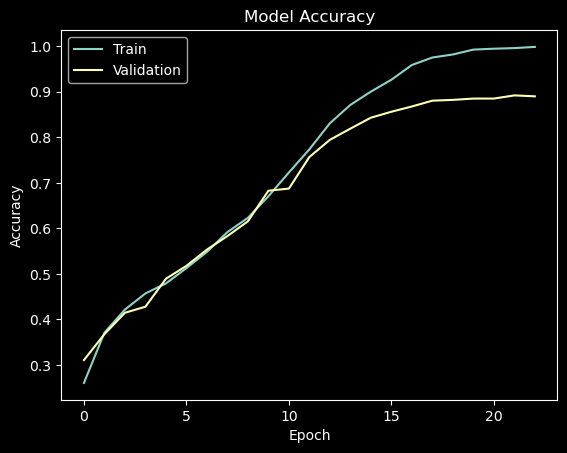

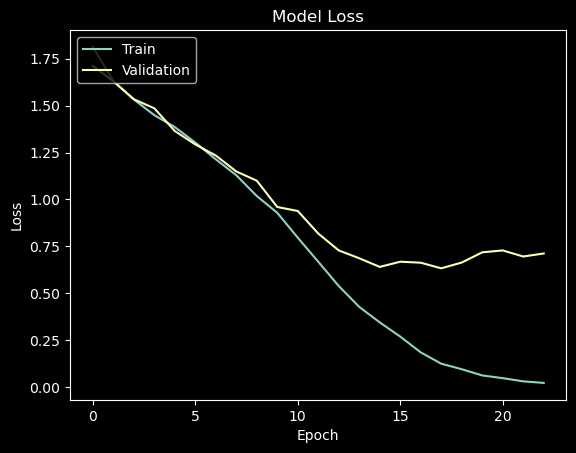

In [19]:
# hämta träningshistorik
with open('historyskarp3occam.pkl', 'rb') as file:
    historyskarp = pickle.load(file)

# Plot accuracies
plt.plot(historyskarp['accuracy'])
plt.plot(historyskarp['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plots loss
plt.plot(historyskarp['loss'])
plt.plot(historyskarp['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# nedan ses att overfitting kan antas börja redan runt epok 10 med denna enkla modell. dropout layer kan vara ett alternativ 
# att lägga emellan för att försena detta men då validation accuracy börjar plana ut på en hög nivå (runt 0,9) så tycker jag 
# det är tillräckligt bra och väljer att inte göra modellen mer komplex. Occammodellen är det enklaste funna sättet att lösa
# uppgiften och används nedan i en realtidsvideocapture deployment.

# Realtidsvideocapture med Occammodellen

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


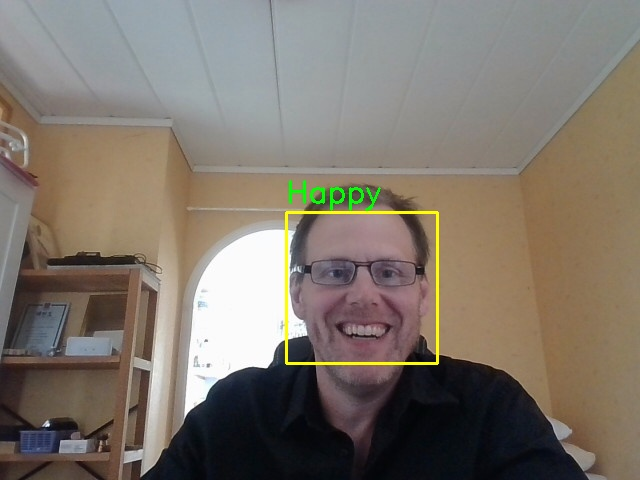

In [6]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import os
from IPython.display import display, Image, clear_output

#  Haar Cascade sökväg
haar_cascade_path = 'haarcascade_frontalface_default.xml'
#  Haar Cascade fil
if not os.path.exists(haar_cascade_path):
    raise FileNotFoundError(f"Haar cascade file not found at path: {haar_cascade_path}")

# face detector och min occammodellering 
face_classifier = cv2.CascadeClassifier(haar_cascade_path)
classifier = load_model('./modelskarp3occam.keras')

# labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Initialisera videocapture
cap = cv2.VideoCapture(0)

# koll om kameran öppnas
if not cap.isOpened():
    raise Exception("Could not open video device")

# videoframe proportioner
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

try:
    while True:
        # frame för frame
        ret, frame = cap.read()
        
        #  errorprint om ingen capture o loopbreak
        if not ret:
            print("Failed to grab frame")
            break

        # till gråskala
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray)

        # Loop igenom faces
        for (x, y, w, h) in faces:
            # rektangel runt
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
            
            # extrahera det intressanta området
            roi_gray = gray[y:y + h, x:x + w]
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

            # området får ej vara tomt
            if np.sum([roi_gray]) != 0:
                roi = roi_gray.astype('float') / 255.0
                roi = img_to_array(roi)
                roi = np.expand_dims(roi, axis=0)

                # Prediktion
                prediction = classifier.predict(roi)[0]
                label = emotion_labels[prediction.argmax()]
                label_position = (x, y - 10)  
                
                # label text
                cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            else:
                cv2.putText(frame, 'No Faces', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # För att visa i Jupyter notebook
        _, jpeg = cv2.imencode('.jpg', frame)
        display(Image(data=jpeg.tobytes()))
        
        # Clear output före nästa
        clear_output(wait=True)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

except KeyboardInterrupt:
    pass

finally:
    # släpp videocapture och stäng fönster
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
# 1.	Utmaningar du haft under arbetet samt hur du hanterat dem. 
Jag studerade datasetet för länge denna gång och sedan fanns inte möjlighet att lägga lika mycket tid som tidigare kurser så jag blev tvungen att göra bara en liten fördjupning.

#2.	Vilket betyg du anser att du skall ha och varför. 
Min fördjupning är kanske något tunn men explainabilty och minimal datakraft är viktiga områden. Ett tveksamt VG kan jag vara värd men har full förståelse för om detta inte räcker.


#3.	Tips du hade ”gett till dig själv” i början av kursen nu när du slutfört den. 
Att ha bättre koll på mina övriga åtaganden under sista veckorna av Maj. Jag hade börjat med deep learning redan under förra kursen om jag vetat bättre.
